In [1]:
# Lab 6th - White Noise Process
# "my method" - solution with function and plot
# final version updated with autocorrelation function

# first we import the functions which will be used for our program.

# we will use the numpy and matplotlib packages
# we will also import the statistics package because it might be of need
# same thing with math package which is built-in Python module (and optional as well)
# there are no random numbers here

import numpy as np
import matplotlib.pyplot as plt

# optional packages which will be imported as well

import math
import statistics

# we will also import sqrt from numpy function which stands for square root
# and might be optional

In [2]:
# declaring our function first
# as meant by using the def term in Python
# and variables-parameters inside of it

def whitenoise(x0 = 0, steps = 1000, mn = 0, sd = 1, a = 1):
    
    # all our variables have been initialized at the beginning of the function
    # (see above)
    
    '''
    meant by:
        x0 represents our starting point
        steps represent the number of steps - initially we will use 1000 steps in our code
        mn represents Gaussian mean (or mean) and will be set to 0 initially
        sd represents Gaussian standard deviation
        a represents amplification parameter
    '''
    
    # we will create a result array consisting of zeros
    # using numpy
    
    ns = np.zeros(steps)
    
    # we will also initialize all of our array values to zero as their initial position
    # first begin with the start value
    
    ns[0] = x0
    
    # for-loop
    
    for t in range(1, steps):
        ns[t] = a * np.random.normal(mn, sd)
    
    # return time series
    return ns

WN = whitenoise()

In [3]:
# we will declare and calculate mean, standard deviation or variance

# new value for mean because the previous one was used to calculate the function
# mn represents Gaussian mean - we will use a new one
# and to calculate them we will use statistics library

# mean value using statistics library

mean = statistics.mean(WN)

print("Mean value is: ", mean)

# variance value using statistics library

var = statistics.variance(WN)

print("Variance value is: ", var)

# standard deviation using statistics library

sdev = statistics.stdev(WN,mean)

print("Standard deviation value is: ", sdev)

Mean value is:  0.035319580674388236
Variance value is:  1.01847322775564
Standard deviation value is:  1.0091943458797419


Text(0.5, 1.0, 'White Noise')

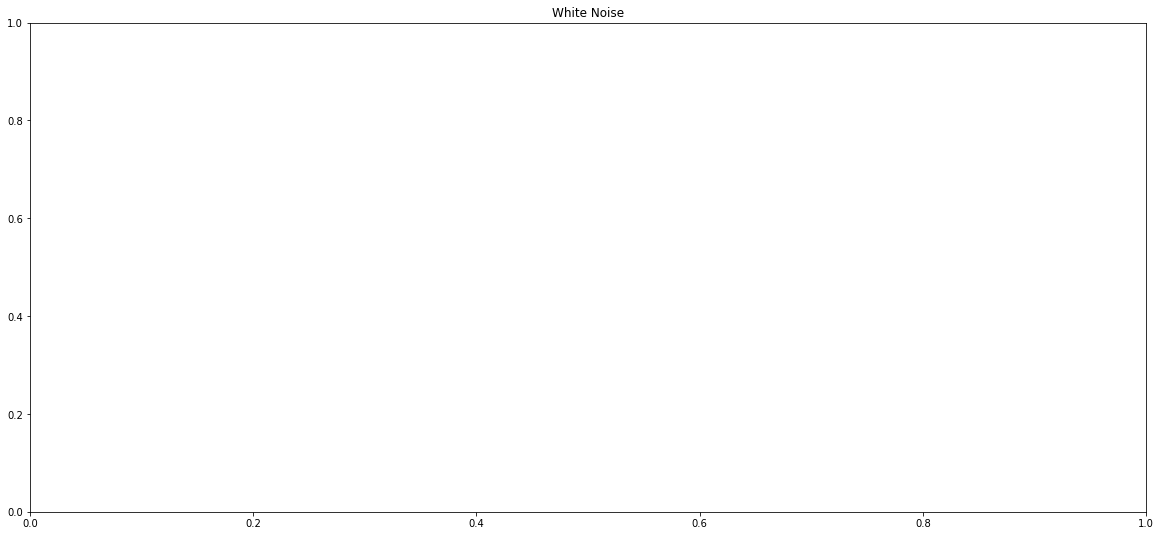

In [4]:
# we will use and define our plot

# first define figure size

plt.figure(figsize=(20,9))

# then use a title for our plot

plt.title('White Noise')

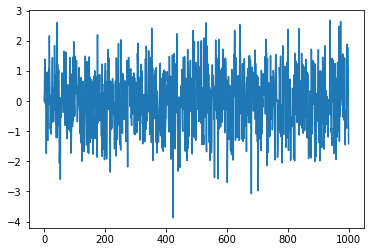

In [5]:
# second define and display the plots for each process
# no starting point (x0) or amplification parameter used for the first plot we're trying out

plt.plot(whitenoise(), label='No starting point or amplification parameter used')

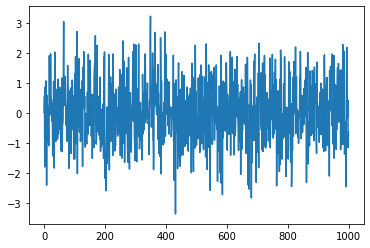

In [6]:
# then experiment with amplification parameters of our choice

# the upcoming plots are assigned for a starting point of our choice
# we can add whatever value we like

# experiment for a=1 (amplification parameter set to 1)

plt.plot(whitenoise(a=1.), label='a=1')

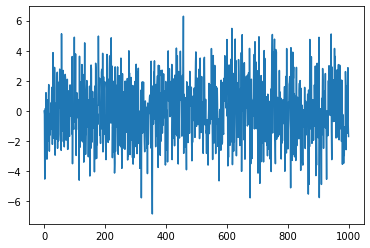

In [7]:
# experiment for a=2 (amplification parameter set to 2)

plt.plot(whitenoise(a=2.), label='a=2')


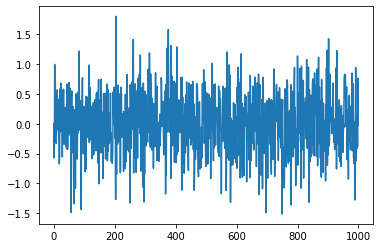

In [8]:
# experiment for a=0.5 (amplification parameter set to 0.5)

plt.plot(whitenoise(a=0.5), label='a=0.5')

In [9]:
# then display the final plot and what is used for each parameter

# update with orbits

final = []

for i in range(10):
    
    y=[]
    
    for j in range(10):
        
        x = whitenoise()
        y.append(x[-1])
        
    final.append(np.mean(y))

In [10]:
# now that we have both tables set we will calculate covariance
# before the final plot

# covariance using numpy library

cov = np.cov(y)
print("Covariance value is: ", cov)

Covariance value is:  0.47778137118438546


In [11]:
# autocorrelation function

def AutocorrelationFunction(x, lag=20):
    '''
    x: Input Data
    lag: Time lag
    '''
    autocor = np.array([1]+[np.corrcoef(x[:-i], x[i:])[0,1] for i in range(1, lag)])
    return autocor

ac = AutocorrelationFunction(x)

print (ac)

[ 1.          0.02445851  0.00491026  0.0385152   0.02901657 -0.01399837
  0.00417422 -0.00313046 -0.03779375  0.01920013  0.05338252 -0.04205581
  0.03074584  0.02944391 -0.02641165 -0.02440428  0.01021251 -0.00323898
 -0.04253795 -0.03649593]


No handles with labels found to put in legend.


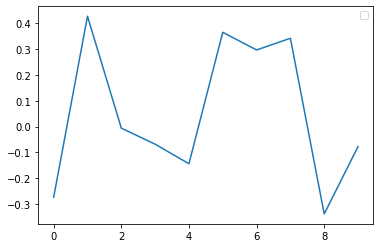

In [14]:
plt.plot(final)
plt.legend()